In [117]:
%load_ext autoreload
%autoreload 2

In [145]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)
import os, sys
import datetime
import seaborn as sns
import scipy.stats as stats
from scipy.stats import chi2_contingency, beta, binom
from statsmodels.stats.proportion import proportions_ztest
from matplotlib.lines import Line2D
import plotly.graph_objs as go

In [144]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('../data/AdSmartABdata.csv')
df

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
...,...,...,...,...,...,...,...,...,...
8072,ffea24ec-cec1-43fb-b1d1-8f93828c2be2,exposed,2020-07-05,7,Generic Smartphone,6,Chrome Mobile,0,0
8073,ffea3210-2c3e-426f-a77d-0aa72e73b20f,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
8074,ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7,control,2020-07-04,9,Generic Smartphone,6,Chrome Mobile,0,0
8075,ffeeed62-3f7c-4a6e-8ba7-95d303d40969,exposed,2020-07-05,15,Samsung SM-A515F,6,Samsung Internet,0,0


In [7]:
print(f" There are {df.shape[0]} rows and {df.shape[1]} columns")

 There are 8077 rows and 9 columns


In [8]:
df.isna().sum()

auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64

# Data Exploration

In [9]:
df['yes'].value_counts()

0    7505
1     572
Name: yes, dtype: int64

In [10]:
df['no'].value_counts()

0    7406
1     671
Name: no, dtype: int64

In [11]:
# def yesno(df):
#     count = 0
#     if df['yes'] == df['no']:
#         count = count + 1
#     return count
# yesno(df)

In [12]:
df['experiment'].value_counts()

control    4071
exposed    4006
Name: experiment, dtype: int64

In [13]:
df['device_make'].value_counts()

Generic Smartphone     4743
iPhone                  433
Samsung SM-G960F        203
Samsung SM-G973F        154
Samsung SM-G950F        148
                       ... 
Samsung SM-A505F          1
D5803                     1
Samsung SM-G6100          1
HTC M10h                  1
XiaoMi Redmi Note 5       1
Name: device_make, Length: 270, dtype: int64

In [14]:
df['auction_id'].value_counts()

0008ef63-77a7-448b-bd1e-075f42c55e39    1
aa14b324-5c46-4b3a-8e75-18d78968495b    1
aa84454c-a749-4c98-bf9f-1f99c04416af    1
aa6ecb40-6a48-4c06-a611-4c9aa9023ea8    1
aa6c6cda-e498-4e8f-b886-1d969bd376ea    1
                                       ..
56c87344-e876-41a3-9011-feb8f7e58cd5    1
56bf959a-642f-4814-bf08-55d634554d5a    1
56bd072c-a748-4355-b2d1-258d82d401b0    1
56bb25c7-f778-4690-90be-034b1982fe03    1
fffbb9ff-568a-41a5-a0c3-6866592f80d8    1
Name: auction_id, Length: 8077, dtype: int64

In [15]:
df['browser'].value_counts()

Chrome Mobile                 4554
Chrome Mobile WebView         1489
Samsung Internet               824
Facebook                       764
Mobile Safari                  337
Chrome Mobile iOS               51
Mobile Safari UI/WKWebView      44
Chrome                           3
Pinterest                        3
Opera Mobile                     3
Opera Mini                       1
Edge Mobile                      1
Android                          1
Firefox Mobile                   1
Puffin                           1
Name: browser, dtype: int64

In [16]:
# Prints Summary of Numerical Data
df.describe()

,hour,platform_os,yes,no
count,8077.000000,8077.000000,8077.000000,8077.000000
mean,11.615080,5.947134,0.070818,0.083075
std,5.734879,0.224333,0.256537,0.276013
min,0.000000,5.000000,0.000000,0.000000
25%,7.000000,6.000000,0.000000,0.000000
50%,13.000000,6.000000,0.000000,0.000000
75%,15.000000,6.000000,0.000000,0.000000
max,23.000000,7.000000,1.000000,1.000000


In [17]:
# Importing the warning library to ignore the warning messages that are not that much important

import warnings
warnings.filterwarnings('ignore')

In [18]:
# Prints Summary of Categorical Data
df.describe(include=[np.object])

,auction_id,experiment,date,device_make,browser
count,8077,8077,8077,8077,8077
unique,8077,2,8,270,15
top,0008ef63-77a7-448b-bd1e-075f42c55e39,control,2020-07-03,Generic Smartphone,Chrome Mobile
freq,1,4071,2015,4743,4554


In [19]:
# showing the experiment unique values
df['experiment'].unique()

array(['exposed', 'control'], dtype=object)

In [20]:
# showing the device unique values
# df['device_make'].unique()

In [21]:
user_grp = df.groupby(['experiment']) 
user_grp.value_counts()

experiment  auction_id                            date        hour  device_make         platform_os  browser                yes  no
control     00187412-2932-4542-a8ef-3633901c98d9  2020-07-03  15    Samsung SM-A705FN   6            Facebook               0    0     1
            fd1b8ea5-5397-4fae-a7f6-3c11fa3cef70  2020-07-03  15    Samsung SM-G975F    6            Samsung Internet       1    0     1
            ff07272c-a61c-4e8f-99fc-7159bd2bcab1  2020-07-03  15    Samsung SM-A105FN   6            Chrome Mobile WebView  0    0     1
            ffea3210-2c3e-426f-a77d-0aa72e73b20f  2020-07-03  15    Generic Smartphone  6            Chrome Mobile          0    0     1
            ffcea781-a6e7-4f98-9d90-f95377270476  2020-07-03  15    Samsung SM-N976B    6            Facebook               0    0     1
                                                                                                                                      ..
exposed     a9b2b55e-16e0-4715-ad8a-5bfca764b0

<AxesSubplot:>

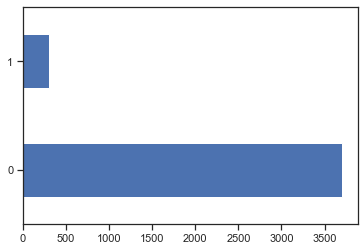

In [22]:
user_grp.get_group('exposed')['yes'].value_counts()[0:5].plot(kind='barh')

In [23]:
user_grp['yes'].value_counts()

experiment  yes
control     0      3807
            1       264
exposed     0      3698
            1       308
Name: yes, dtype: int64

### This graph shows from the exposed users who takes the new advert quiz only around 308 of the users says yes and the rest says no

<AxesSubplot:>

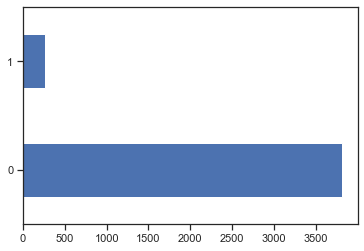

In [24]:
user_grp.get_group('control')['yes'].value_counts()[0:5].plot(kind='barh')

<AxesSubplot:>

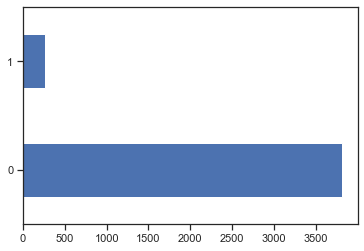

In [25]:
user_grp.get_group('control')['yes'].value_counts()[0:5].plot(kind='barh')

### This graph shows from the control users who takes the dummy add only around 264 of the users says yes and the rest says no

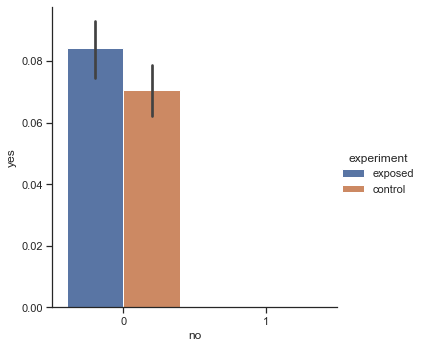

In [26]:
sns.catplot(x="no", y="yes", hue="experiment", kind="bar", data=df)

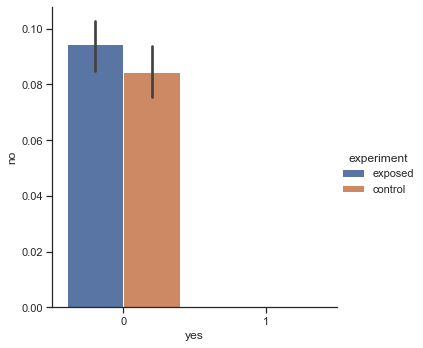

In [27]:
sns.catplot(x="yes", y="no", hue="experiment", kind="bar", data=df)

(array([4006.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0., 4071.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <BarContainer object of 50 artists>)

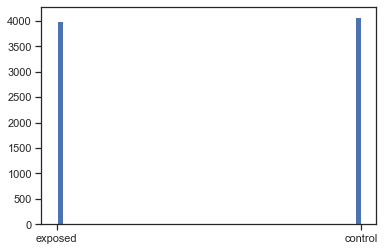

In [28]:
plt.hist(df['experiment'], bins=50)

### This graph shows the control user are a little bit higer than the exposed users

# A/B HYPOTHESIS TESTING

In [119]:
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from plot import Plot

ImportError: cannot import name 'Logger' from 'logger' (C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\logger\__init__.py)

#### Spliting numerical and categorical data

In [29]:
numerical_column = df.select_dtypes(exclude="object").columns.tolist()
categorical_column = df.select_dtypes(include="object").columns.tolist()
print("Numerical Columns:", numerical_column)
print("****************")
print("Categorical Columns:", categorical_column)

Numerical Columns: ['hour', 'platform_os', 'yes', 'no']
****************
Categorical Columns: ['auction_id', 'experiment', 'date', 'device_make', 'browser']


##  The test given for the two groups
control user =>  who have been shown the dummy ad
exposed user => users who have been shown a creative (ad) that was designed by SmartAd for the client. 

NUll HYPOTHESIS = NO
ALTERNATE HYTPOTHESIS = YES

In [30]:
### FIND THE MEAN VALUE FOR THE NULL HYPOTHESIS
df['no'].mean()

0.0830753992819116

In [31]:
df.describe()

,hour,platform_os,yes,no
count,8077.000000,8077.000000,8077.000000,8077.000000
mean,11.615080,5.947134,0.070818,0.083075
std,5.734879,0.224333,0.256537,0.276013
min,0.000000,5.000000,0.000000,0.000000
25%,7.000000,6.000000,0.000000,0.000000
50%,13.000000,6.000000,0.000000,0.000000
75%,15.000000,6.000000,0.000000,0.000000
max,23.000000,7.000000,1.000000,1.000000


### 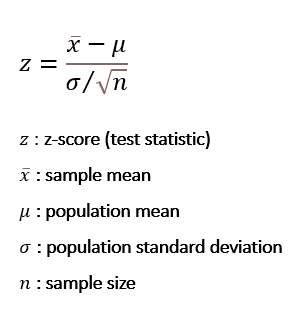

The most common value for alpha is 5%, i.e. 0.05

#value of z at 0.05 making it .025 for 2 sided we know from z-table +_ 1.96

In [32]:
sampData=df['no'][np.argsort(np.random.random(1000))[:70]]

In [33]:
meanSampData=sampData.mean()
hypMean=0.083075
N=70
standPop=np.std(df['no'])

In [34]:
import math
z = (meanSampData-hypMean)/(standPop/math.sqrt(N))
z

0.5130676901327472

. as calculated z score 0.08 is less than 1.96 (tabular z score), we reject the null hypothesis

. if also we would have got -0.08 is less than -1.96 we would have rejected the Null hypothesis

. Observed value = 0.08

. Critical value = 1.96

## p-value (observed significance level)
The p-value defines the smallest probability (alpha) for which the null hypothesis can be rejected.
let say alpha is 0.05

as observed z value is 0.08 from the ztable the probabilty of z is .0808

p-value = 1-0.0808 = 0.9192
p-value is greater that 0.5 which means failed to reject the null hypothesis

In [60]:
# Filter out users that were not interacting
non_interact_users = df.query('yes == 1 | no == 1')
non_interact_users.shape[0]

1243

In [73]:
# Divide a dataframe by exposed and control group
exposed = relevant_rows.query('experiment == "exposed"')
control = relevant_rows.query('experiment == "control"')

In [61]:
print(f'The total number of exposed group {non_interact_users.shape[0]}')
print(f'The total number of exposed group {exposed.shape[0]}')
print(f'The total number of exposed group {control.shape[0]}')

The total number of exposed group 1243
The total number of exposed group 657
The total number of exposed group 586


In [67]:
### checking the conversion rate
exposed_mean = '{0:.2f}%'.format(exposed.yes.mean()*100)
control_mean = '{0:.2f}%'.format(control.yes.mean()*100)
print('The conversion rate in the exposed group is  {}'.format(exposed_mean))
print('The conversion rate in the exposed group is  {}'.format(control_mean))

The conversion rate in the exposed group is equal to 46.88%
The conversion rate in the exposed group is equal to 45.05%


In [85]:
### DIFFERENCE BETWEEN EXPOSED GROUP MEAN AND CONTROLLED MEAN
diff = exposed.yes.mean() - control.yes.mean()
diff = diff * 100
print('The differnce of conversion rate between the two groups' ,"{0:.2f}%".format(diff))


The differnce of conversion rate between the two groups 1.83%


In [87]:
### Assign the conversion value of the group
exposed_converted = exposed.query('yes == 1')
control_converted = control.query('yes == 1')
print(f'The number of converted exposed group {exposed_converted.shape[0]}')
print(f'The number of converted control group {control_converted.shape[0]}')

The number of converted exposed group 308
The number of converted control group 264


In [90]:
#storing number of conversions for exposed and control groups as numpy arrays
count = np.array([exposed_converted.shape[0], control_converted.shape[0]])
#storing sample sizes of exposed and control group as numpy arrays
nobs = np.array([exposed.shape[0], control.shape[0]])
#storing results of z test in variables
stat, p_val = proportions_ztest(count, nobs, alternative = 'larger')
p_form = '{0:.2f}%'.format(p_val*100)
print('P-value is equal to {}'.format(p_form))

P-value is equal to 25.92%


In [97]:
# Draw 100000 samples from binominal distribution
exposed_simulation = np.random.binomial(exposed.shape[0], exposed.yes.mean(), 100000)/exposed.shape[0]
control_simulation = np.random.binomial(control.shape[0], control.yes.mean(), 100000)/control.shape[0]
p_diffs = exposed_simulation - control_simulation
diffs = np.array(p_diffs)

#Creation of normal distribution centered at zero
null_vals = np.random.normal(0, np.std(diffs), len(diffs))
null_vals

array([-0.00931602,  0.04185128, -0.00495163, ...,  0.00963829,
       -0.00969796,  0.00275293])

In [135]:
def statplot(data, lim, obs_stat, title):
    """
    This function creates a plot, that represents sampling distribution. 
    This plot is formatted and has main statistics on it
    Arguments:
    data = array
    lim = height of the plot
    obs_stat = observed statistic
    title = chart title
    """
    
    #Create a kdeplot
    plt.figure(figsize=(12,4), tight_layout=True)
    ax = sns.kdeplot(data, linewidth = 0.8, color = 'black')
    
    # Simple formatting
    frame = ['right', 'left', 'top']
    for i in frame:
        ax.spines[i].set_visible(False)

    plt.title(title)
    plt.ylabel('')
    plt.yticks([], [])
    
    # Legend
    line = Line2D([0], [0], color='red', linestyle = '-', label='observed statistic')
    line_dashed = Line2D([0], [0], color='black', linestyle = '--', label='mean and standard deviation')
    plt.legend(handles=[line, line_dashed], loc='upper left');
    
    # Create a list of 3 standard deviation to the left and to the right and mean
    std_list = []
    std_list_format = []
    for i in range(-3,4):
        std_dev = np.std(data) * i + np.mean(data)
        std_list.append(std_dev)
        std_list_format.append('{0:.3f}'.format(std_dev) + '\n {} std'.format(i))
        
    # Create a list of corresponding y values
    data_x, data_y = ax.lines[0].get_data()
    height = []
    for i in std_list:
        height.append(np.interp(i, data_x, data_y))
        
    # Plotting vertical lines representing std deviations 
    for a, b in zip(std_list, height):
        plt.axvline(a, 0, b/lim, color = 'black', alpha = 1, linewidth = 0.8, linestyle = '--')
        plt.plot(a, b, marker = 'o', color = 'blue')
    
    # Plotting observed statistic
    obs_line_height = np.interp(obs_stat, data_x, data_y)
    plt.axvline(obs_stat, 0, obs_line_height/lim, color = 'red', alpha = 1, linewidth = 0.8, linestyle = '-')
    plt.plot(obs_stat, obs_line_height, marker = 'o', color = 'red')
            
    # Plotting x ticks
    x_ticks = std_list
    x_labels = std_list_format
    plt.xticks(x_ticks, x_labels)
    plt.ylim(0,lim)
    plt.show()

In [131]:
def shading(data, left, right, color):
    
    """
    This function shades areas of the kde plot.
    Arguments:
    data = array
    left = left boundary of the area to be shaded
    right = right boundary of the area to be shaded
    color = color
    """
    
    #Shading areas
    kde = stats.gaussian_kde(data)
    shade = np.linspace(left, right, 100)
    plt.fill_between(shade, kde(shade), color = color, alpha = 0.5);

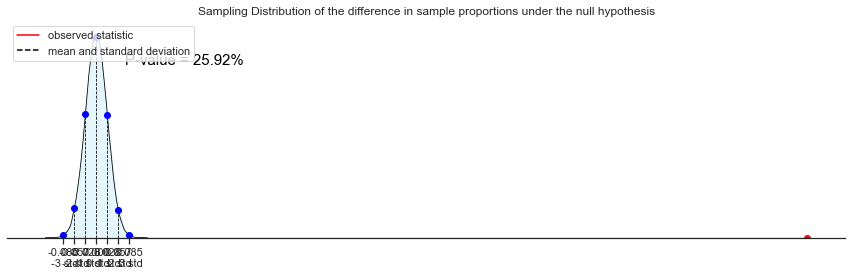

In [132]:
# Plotting the sampling distribution
statplot(null_vals, 15, diff, 'Sampling Distribution of the difference in sample proportions under the null hypothesis')
shading(null_vals, diff, null_vals.max(),'#aaffb5')
shading(null_vals, null_vals.min(), diff,'#cceefb')
plt.text(0.075, 12, "P-value = {}".format(p_form), color = 'black', size = 15);

The probability that the observed difference falls into the sampling distribution of the null hypothesis is equal to 25.92% (0.25). Given that our level of significance is 5% (0.05), we fail to reject the null hypothesis, ie we do not have enough evidence to conclude that the conversion rate with the new creative ad is higher than with the dummy one.

In [133]:
# Calculate z statistic
zscore = stats.norm.ppf(1 - .05)

# Calculate mean proportion for exposed group
p1 = exposed.yes.mean()
# Calculate mean proportion for control group
p2 = control.yes.mean()
# Calculate distance from the mean
distance_from_mean = ((p1*(1-p1)/exposed.yes.shape[0]) + (p2*(1-p2)/control.yes.shape[0])) ** 0.5 * zscore

# Lower boarder of the interval
low = diff - distance_from_mean
# Higher boarder of the interval
high = diff + distance_from_mean

print('The 90% confidence interval falls between {} and {}.'.format(low, high))

The 90% confidence interval falls between 1.7819955018933502 and 1.8751283572034834.


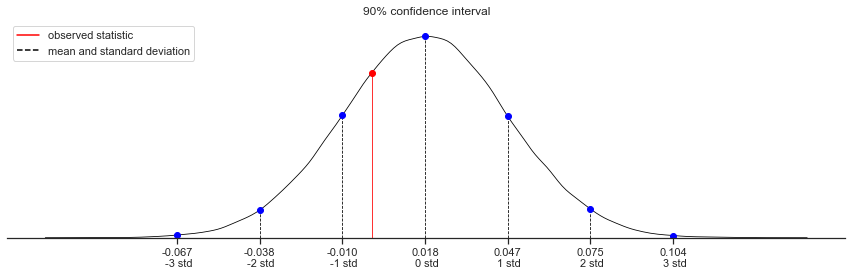

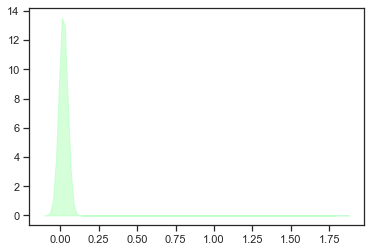

In [136]:
# Plotting the confidence interval
statplot(diffs, 15, np.mean(null_vals), '90% confidence interval')
shading(diffs, diffs.min(), low, '#aaffb5')
shading(diffs, low, high, '#cceefb')
shading(diffs, high, diffs.max(), '#aaffb5')

The null hypothesis is within the confidence interval, as can be shown. We can anticipate 90% of confidence intervals overlapping with zero. Our true proportional difference is zero under the null hypothesis. As a result, the P-value is greater than the 10% significance limit. (It would be 5% for the one-tailed test). As a result, I lack sufficient evidence to reject the null hypothesis and propose the alternative hypothesis.

In [138]:
# Experiment 1:

control_conversion = df[(df['experiment'] == 'control') & (df['yes'] == 1)].shape[0] / df[(df['experiment'] == 'control')].shape[0]
treatment_conversion = df[(df['experiment'] == 'exposed') & (df['yes'] == 1)].shape[0] / df[(df['experiment'] == 'exposed')].shape[0]
lift = (treatment_conversion - control_conversion) / control_conversion


print(f"control conversion percentage: {round(control_conversion * 100, 2)}%")
print(f"Treatment conversion percentage: {round(treatment_conversion * 100, 2)}%")
print(f"Lift percentage: {round(lift * 100, 2)}%")

control conversion percentage: 6.48%
Treatment conversion percentage: 7.69%
Lift percentage: 18.56%


In [140]:
# Create Contngency Table for chi square test
control_converted = df[(df['experiment'] == 'control') & (df['yes'] == 1)].shape[0]
treatment_converted = df[(df['experiment'] == 'exposed') & (df['yes'] == 1)].shape[0]
control_non_converted = df[(df['experiment'] == 'control') & (df['no'] == 1)].shape[0]
treatment_not_converted = df[(df['experiment'] == 'exposed') & (df['no'] == 1)].shape[0]

contingency_table = np.array([[control_converted, control_non_converted], [treatment_converted, treatment_not_converted]])
contingency_table 

array([[264, 322],
       [308, 349]])

In [141]:
chi, p_value, _, _ = chi2_contingency(contingency_table, correction=False)
chi, p_value

(0.41690289642162887, 0.518486498219898)

Since the p_value > 0.05, we cannot reject null hypothesis. Hence, we cannot conclude if there exists a relationship between the control and treatment groups.

In [142]:
print(f"{round(p_value * 100, 2)}% probability that a more extreme chi square than {round(chi, 3)} would have occured by chance")

51.85% probability that a more extreme chi square than 0.417 would have occured by chance
